In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV dataset with ANSI encoding as it includes German Tokens

df = pd.read_csv(r"dataset/accidents.csv", encoding = "ANSI")
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunf?le,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunf?le,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunf?le,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunf?le,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunf?le,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [3]:
# Recognizing first 5 columns for further analysis

df = df.iloc[:, :5]
df = df.dropna()
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunf?le,insgesamt,2020,Summe,430.0
13,Alkoholunf?le,insgesamt,2020,202001,28.0
14,Alkoholunf?le,insgesamt,2020,202002,40.0
15,Alkoholunf?le,insgesamt,2020,202003,27.0
16,Alkoholunf?le,insgesamt,2020,202004,26.0


In [4]:
# Renaming Columns to English Counterparts for universal comprehension

df = df.rename(
    columns = {
        'MONATSZAHL':'Category',
        'AUSPRAEGUNG':'AccidentType',
        'JAHR':'Year',
        'MONAT':'Month',
        'WERT':'Value',        
    }
)
df.head()

,Category,AccidentType,Year,Month,Value
12,Alkoholunf?le,insgesamt,2020,Summe,430.0
13,Alkoholunf?le,insgesamt,2020,202001,28.0
14,Alkoholunf?le,insgesamt,2020,202002,40.0
15,Alkoholunf?le,insgesamt,2020,202003,27.0
16,Alkoholunf?le,insgesamt,2020,202004,26.0


In [5]:
# Basic Preprocessing to drop yearly summary value records
# More translation of Categorical Values for ease of comprehension

df.drop(df[df['Month'] == "Summe"].index, inplace = True)

for index, row in df.iterrows():
    if row['Category'] == "Alkoholunf?le":
        df['Category'][index] = "Alcohol Accidents"
    if row['Category'] == "Fluchtunf?le":
        df['Category'][index] = "Escape Accidents"
    if row['Category'] == "Verkehrsunf?le":
        df['Category'][index] = "Traffic Accidents"
    if row['AccidentType'] == "insgesamt":
            df['AccidentType'][index] = "subtotal"
    if row['AccidentType'] == "Verletzte und Get?ete":
            df['AccidentType'][index] = "injured and killed"
    if row['AccidentType'] == "mit Personensch?en":
            df['AccidentType'][index] = "with people"
        
df.head()

<ipython-input-5-1685b44ba39c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][index] = "Alcohol Accidents"
<ipython-input-5-1685b44ba39c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AccidentType'][index] = "subtotal"
<ipython-input-5-1685b44ba39c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AccidentType'][index] = "injured and killed"
<ipython-input-5-1685b44ba39c>:10: SettingWithCopyWarning: 
A val

,Category,AccidentType,Year,Month,Value
13,Alcohol Accidents,subtotal,2020,202001,28.0
14,Alcohol Accidents,subtotal,2020,202002,40.0
15,Alcohol Accidents,subtotal,2020,202003,27.0
16,Alcohol Accidents,subtotal,2020,202004,26.0
17,Alcohol Accidents,subtotal,2020,202005,40.0


In [6]:
# Counters for each category of accidents is counted manually as the dataframe on itself cannot fully portray this information
# As the subtotal type and injured, death statistics are not mutually exclusive

ctr_alcohol = 0
ctr_escape = 0
ctr_traffic = 0

for index, row in df.iterrows():
    if row['Month'] != "Summe":
        if row["Category"] == "Alcohol Accidents" and row["AccidentType"] == "subtotal":
            ctr_alcohol += row["Value"]
        if row["Category"] == "Escape Accidents" and row["AccidentType"] == "subtotal":
            ctr_escape += row["Value"]
        if row["Category"] == "Traffic Accidents" and row["AccidentType"] == "subtotal":
            ctr_traffic += row["Value"]

# Generating dictionary for plotting
accident_nos = {
    "Alcohol Accidents": ctr_alcohol, 
    "Escape Accidents": ctr_escape, 
    "Traffic Accidents": ctr_traffic
}
print(accident_nos)

{'Alcohol Accidents': 11026.0, 'Escape Accidents': 221616.0, 'Traffic Accidents': 891374.0}


<BarContainer object of 3 artists>

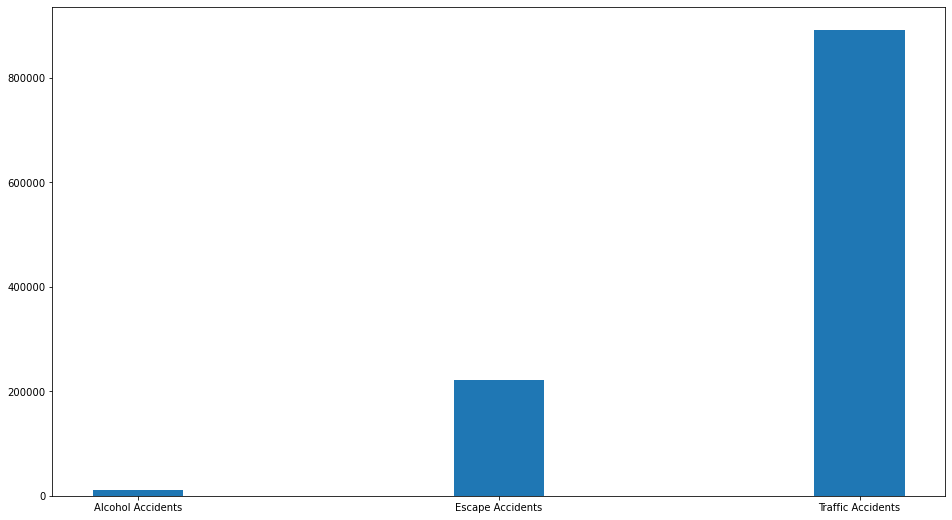

In [7]:
# Histogram Visualization

plt.figure(figsize = (16, 9))
plt.bar(accident_nos.keys(), accident_nos.values(), width=0.25)

In [9]:
# Label Encoding Path.....

for i in df.select_dtypes('object').columns:
    le = LabelEncoder().fit(df[i])
    df[i] = le.transform(df[i]) 

NameError: name 'LabelEncoder' is not defined